In [1]:
# For data wrangling
import pandas as pd
import numpy as np

#for Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd

data = pd.read_csv("E:/Data Science/CSV dataset/StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
# Collecting the info about the dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


* Since no missing values is present hence we can proceed for futher calculations

In [4]:
col_list = list(data.select_dtypes(include = 'object'))
col_list

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [5]:
# Creating new column 'Passed' to predict the students passing probability

df = pd.DataFrame({'Passed' : [0,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,1]}) 

final_df = pd.concat([data, df], axis = 1)

final_df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,0.0
1,female,group C,some college,standard,completed,69,90,88,0.0
2,female,group B,master's degree,standard,none,90,95,93,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1.0
4,male,group C,some college,standard,none,76,78,75,0.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,NaN
996,male,group C,high school,free/reduced,none,62,55,55,NaN
997,female,group C,high school,free/reduced,completed,59,71,65,NaN
998,female,group D,some college,standard,completed,68,78,77,NaN


In [6]:
dummies = pd.get_dummies(final_df[col_list])
dummies

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [7]:
# Removing the column with object values and they are substituted with dummies value

final_df.drop(col_list, inplace = True, axis = 1)
final_df

,math score,reading score,writing score,Passed
0,72,72,74,0.0
1,69,90,88,0.0
2,90,95,93,0.0
3,47,57,44,1.0
4,76,78,75,0.0
...,...,...,...,...
995,88,99,95,NaN
996,62,55,55,NaN
997,59,71,65,NaN
998,68,78,77,NaN


In [8]:
dataset = pd.concat([final_df, dummies], axis = 1)
dataset

,math score,reading score,writing score,Passed,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,0.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,69,90,88,0.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,90,95,93,0.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,47,57,44,1.0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0.0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,NaN,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
996,62,55,55,NaN,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
997,59,71,65,NaN,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
998,68,78,77,NaN,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0


In [9]:
dataset.columns

Index(['math score', 'reading score', 'writing score', 'Passed',
       'gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [10]:
X = dataset.drop(['Passed'], axis = 1).head(35)
X

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,71,83,78,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
6,88,95,92,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
7,40,43,39,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
8,64,64,67,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
9,38,60,50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


In [11]:
Y = dataset['Passed'].head(35)
Y

0     0.0
1     0.0
2     0.0
3     1.0
4     0.0
5     1.0
6     1.0
7     1.0
8     0.0
9     1.0
10    0.0
11    0.0
12    1.0
13    0.0
14    1.0
15    1.0
16    0.0
17    1.0
18    1.0
19    0.0
20    0.0
21    1.0
22    1.0
23    1.0
24    0.0
25    0.0
26    0.0
27    1.0
28    0.0
29    1.0
30    0.0
31    0.0
32    1.0
33    0.0
34    1.0
Name: Passed, dtype: float64

In [12]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state = 1, test_size = 0.2)
x_train.shape, x_val.shape

((28, 20), (7, 20))

In [13]:
model = DecisionTreeClassifier(random_state = 1)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [14]:
y_predict = model.predict(x_val)
y_predict

array([1., 1., 0., 1., 1., 0., 0.])

In [15]:
y_train.value_counts(normalize=True)

0.0    0.535714
1.0    0.464286
Name: Passed, dtype: float64

In [16]:
# distribution in validation set
y_val.value_counts(normalize=True)

1.0    0.571429
0.0    0.428571
Name: Passed, dtype: float64

In [17]:
def mse(x,y):
    
    MSE = round(np.mean((x-y)**2), 4)
    return MSE

In [18]:
print('Mean Square error of the model is :: ', mse(y_val, y_predict))

Mean Square error of the model is ::  0.5714


In [19]:
r_score = model.score(x_val, y_val)
print('R2 value of the model is :: ', r_score )

R2 value of the model is ::  0.42857142857142855


In [20]:
model2 = DecisionTreeRegressor(random_state = 1)
model2.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [21]:
y_predict2 = model.predict(x_val)
y_predict2

array([1., 1., 0., 1., 1., 0., 0.])

In [22]:
print('Mean Square error of the model is :: ', mse(y_val, y_predict))

Mean Square error of the model is ::  0.5714


In [23]:
r_score = model2.score(x_val, y_val)
print('R2 value of the model is :: ', r_score )

R2 value of the model is ::  -1.3333333333333337


In [24]:
model.predict_proba(x_val)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [25]:
y_pred = model.predict_proba(x_val)[:,1]
y_pred

array([1., 1., 0., 1., 1., 0., 0.])

In [26]:
y_new = []

for i in range(len(y_pred)):
    if y_pred[i] <= 0.7:
        y_new.append(0)
    else:
        y_new.append(1)
        
print(y_new)

[1, 1, 0, 1, 1, 0, 0]


In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)

0.42857142857142855

In [28]:
accuracy_score(y_val, y_predict)

0.42857142857142855

In [29]:
# Calculation of Training data score and Validation data score at different depths 

training_score = []
validation_score = []

for depth in range(1,10):
    model3 = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    model3.fit(x_train, y_train)
    training_score.append(model3.score(x_train, y_train))
    validation_score.append(model3.score(x_val, y_val))
    

In [30]:
# Creating a dataframe of all scores at diferent depths

score_df = pd.DataFrame({'Depths' : range(1,10), 'Training Data Score': training_score, 'Validation Data Score': validation_score})
score_df

,Depths,Training Data Score,Validation Data Score
0,1,0.714286,0.571429
1,2,0.785714,0.428571
2,3,0.892857,0.428571
3,4,1.000000,0.428571
4,5,1.000000,0.428571
5,6,1.000000,0.428571
6,7,1.000000,0.428571
7,8,1.000000,0.428571
8,9,1.000000,0.428571


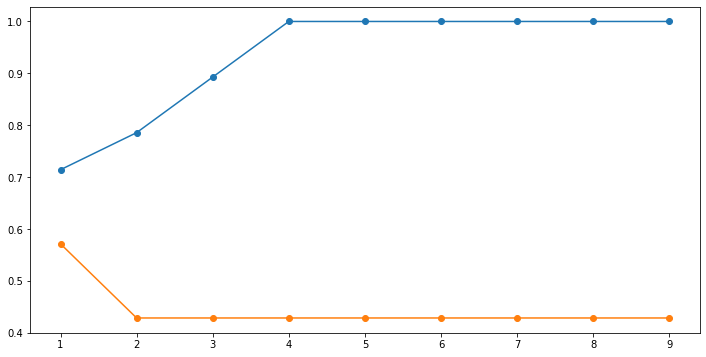

In [31]:
## Plotting the values

plt.figure(figsize = (12,6))
plt.plot(score_df['Depths'], score_df['Training Data Score'], marker = 'o')
plt.plot(score_df['Depths'], score_df['Validation Data Score'], marker = 'o')

* It is clearly shown that after max_depth = 4, model shows same result it means it is ovefitted.